In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [30]:
train = pd.read_csv("C:\\Users\\saham\\pythonprograms\\MNISTtrain.csv")
train.head()
print ("train Dataset shape: ",train.shape)

train Dataset shape:  (42000, 785)


In [31]:
test = pd.read_csv("C:\\Users\\saham\\pythonprograms\\MNISTtest.csv")
test.head()
test.shape

(28000, 784)

In [32]:
train.isnull().any().any()
test.isnull().any().any()

False

In [33]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [34]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis =1)

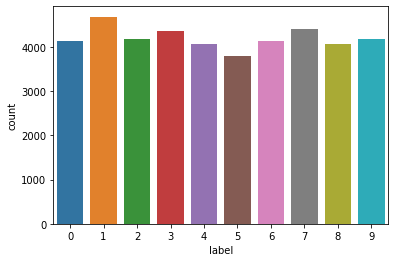

In [35]:
sns.countplot(Y_train)

In [36]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

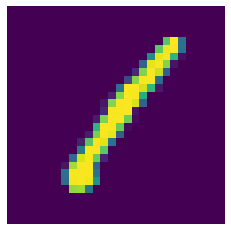

In [37]:
# View row 1 of Dataset as plot
n=int(784**0.5)
img1 = X_train.iloc[0].values 
img1 = img1.reshape((n,n))
plt.imshow(img1)
plt.axis("off")
plt.show()

In [38]:
# Normalize , Reshape and Label Encoding
# perform grayscale normalize to reduce the effect of illumination's differences
# after normalization CNN works faster

# Reshape data to m x n x c, where c is an extra dimension that corresponds to channels

# Label Encoding: Encode labels to one hot vectors
# 9 = [0,0,1,0,0,0,0,0,0,1]

In [39]:
# Normalize the data
X_train = X_train / 255.0
text = test / 255.0

# Y_Train is label = no need to normalize

In [40]:
#shape before reshapeing
print( "* From Train Dataset : \n")
print("x_train shape: ",X_train.shape)
print("x_train Type: ",type(X_train))

print("Y_train shape: ",Y_train.shape)
print("Y_train type: ",type(Y_train))

print( "\n* From Test Dataset : \n")
print("test shape: (x-test) : ",test.shape) 
print("test type (x-test) : ",type(test))

* From Train Dataset : 

x_train shape:  (42000, 784)
x_train Type:  <class 'pandas.core.frame.DataFrame'>
Y_train shape:  (42000,)
Y_train type:  <class 'pandas.core.series.Series'>

* From Test Dataset : 

test shape: (x-test) :  (28000, 784)
test type (x-test) :  <class 'pandas.core.frame.DataFrame'>


In [41]:
#  Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [42]:
# Label Encoding

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)


In [43]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

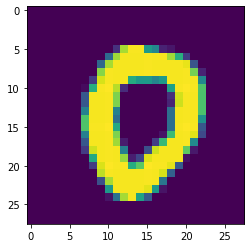

In [44]:
plt.imshow(X_train[108][:,:,0])

In [45]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [46]:
Y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
###  Convolution Neural Network (Theory)

In [48]:
from sklearn.metrics import confusion_matrix
import itertools

In [49]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers#Dense, Dropout , Flatten, Conv2D , MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D


In [50]:
model = Sequential()
###

from  tensorflow.keras.layers import MaxPool2D, Dropout ,Flatten, Dense

model.add(Conv2D(filters =8, kernel_size=(5,5), padding = 'Same', activation = 'relu',input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

###
model.add(Conv2D(filters =16, kernel_size = (3,3) , padding ='Same', activation = 'relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2)))

model.add(Dropout(0.25))

####
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

In [51]:
# define optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9 , beta_2 = 0.999)

In [55]:
# Complile Model

#categorical cross entropy
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])


In [59]:
# Epochs and Batch Size

epochs = 10
batch_size = 250 

In [60]:
# Data Augmentation
 # to prevent overfitting ,we will augment the dataset

datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False, zca_whitening=False, rotation_range=0.5,zoom_range = 0.5,width_shift_range=0.5, height_shift_range=0.5,horizontal_flip=False, vertical_flip=False) 

datagen.fit(X_train)

In [61]:
#fit the model RE WRITE


In [62]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 151 steps, validate on 4200 samples
Epoch 1/10
151/151 [==============================] - 27s 176ms/step - loss: 2.1979 - accuracy: 0.1842 - val_loss: 1.7363 - val_accuracy: 0.4579
Epoch 2/10
151/151 [==============================] - 25s 166ms/step - loss: 1.9316 - accuracy: 0.3116 - val_loss: 1.1893 - val_accuracy: 0.7131
Epoch 3/10
151/151 [==============================] - 25s 164ms/step - loss: 1.7402 - accuracy: 0.3881 - val_loss: 0.8411 - val_accuracy: 0.8243
Epoch 4/10
151/151 [==============================] - 24s 162ms/step - loss: 1.6125 - accuracy: 0.4404 - val_loss: 0.6274 - val_accuracy: 0.8560
Epoch 5/10
151/151 [==============================] - 24s 160ms/step - loss: 1.5298 - accuracy: 0.4733 - val_loss: 0.5080 - val_accuracy: 0.8864
Epoch 6/10
151/151 [==============================] - 23s 154ms/step - loss: 1.4693 - accuracy: 0.4975 - val_loss: 0.4722 - val_

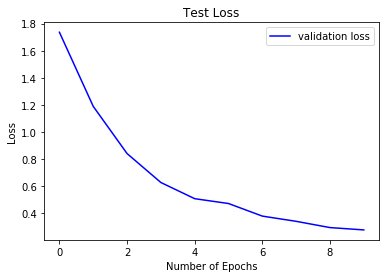

In [63]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

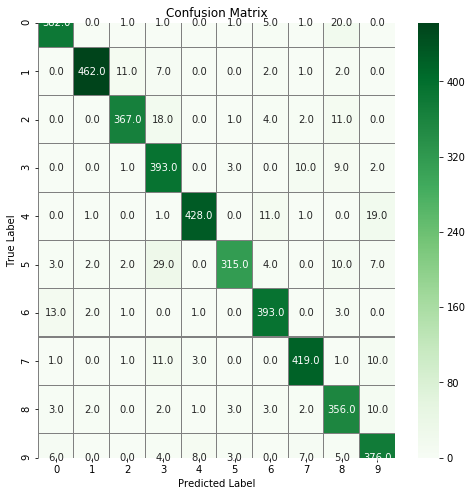

In [64]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()